# Lab 4

## import libs and connect to database

In [74]:
import pandas
import configparser
import psycopg2

## connect to the db and create a cursor

In [75]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd = config['myaws']['pwd']

conn = psycopg2.connect(  host=host,
                       user=user,
                       password = pwd,
                       dbname=db)

In [76]:
cur=conn.cursor()

## q1

In [77]:
q1_sql = """
        select * from gp12.student
        """

In [78]:
df= pandas.read_sql_query(q1_sql,conn)
df[:]

,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s2,IA
2,s3@jmu.edu,s3,IA
3,s4@jmu.edu,s4,IA
4,s5@jmu.edu,s5,IA
5,s6@jmu.edu,s6,IA
6,s7@jmu.edu,s7,IA
7,s8@jmu.edu,s8,IA
8,s9@jmu.edu,s9,IA
9,s10@jmu.edu,s10,IA


## q2

In [79]:
q2_sql = """
        select gp12.professor.p_name,
        gp12.course.c_name
        from gp12.professor
        inner join gp12.course
        on gp12.professor.p_email = gp12.course.p_email
        """

In [80]:
df=pandas.read_sql_query(q2_sql,conn)
df[:]

,p_name,c_name
0,ronald raab,awareness and understanding wmds
1,noel hendrickson,counterfactual reasoning
2,orlandrew danzell,anti money laundering
3,new,new_c_name
4,new_p,data mining


## q3

In [81]:
q3_sql = """
        select c_number,
        count(c_number) as num_enroll
        from gp12.enroll_list
        group by c_number
        """

In [82]:
df=pandas.read_sql_query(q3_sql,conn)
df[:]

,c_number,num_enroll
0,IA340,10


<AxesSubplot:xlabel='c_number'>

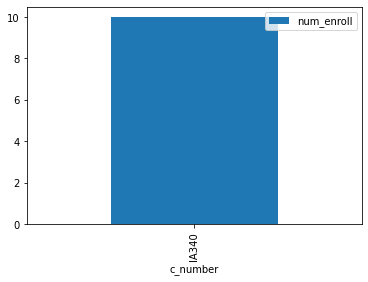

In [83]:
df.plot.bar(x='c_number',y='num_enroll')

## q4

In [84]:
q4_sql = """
        select gp12.professor.p_name,
        count(gp12.course.c_name) as num_course
        from gp12.professor
        inner join gp12.course
        on gp12.professor.p_email = gp12.course.p_email
        group by gp12.professor.p_name
        """

In [85]:
df=pandas.read_sql_query(q4_sql,conn)
df[:]

,p_name,num_course
0,ronald raab,1
1,new_p,1
2,orlandrew danzell,1
3,noel hendrickson,1
4,new,1


<AxesSubplot:xlabel='p_name'>

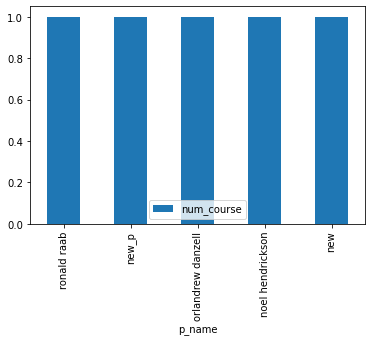

In [86]:
df.plot.bar(x='p_name',y='num_course')

## q5

In [87]:
q5_insert_professor_sql = """
            insert into gp12.professor(p_email,p_name,p_office)
            values('{}','{}','{}')
            """.format('new_lab4_email','new_p_lab4_name','new_lab4_o')
print(q5_insert_professor_sql)


            insert into gp12.professor(p_email,p_name,p_office)
            values('new_lab4_email','new_p_lab4_name','new_lab4_o')
            


In [88]:
cur.execute(q5_insert_professor_sql)

In [89]:
# conn.rollback() #if error, rollback

In [90]:
conn.commit() # no error. commit

In [91]:
df=pandas.read_sql_query('select * from gp12.professor',conn)
df[:]

,p_email,p_name,p_office
0,raabrw@jmu.edu,ronald raab,ISAT 156
1,hendrinx@jmu.edu,noel hendrickson,ISAT 200
2,danzelox@jmu.edu,orlandrew danzell,ISAT 107
3,new_p@jmu.edu,new_p,new_office
4,new@jmu.edu,new,new
5,new_pp@jmu.edu,new_p,new_offic
6,new_lab4_email,new_p_lab4_name,new_lab4_o


In [92]:
q5_insert_course_sql = """
            insert into gp12.course(c_number,c_name,c_room,p_email)
            values('{}','{}','{}','{}')
            """.format('new_lab4_c','new_lab4_n','new_lab4_r','new_lab4_email')
print(q5_insert_course_sql)


            insert into gp12.course(c_number,c_name,c_room,p_email)
            values('new_lab4_c','new_lab4_n','new_lab4_r','new_lab4_email')
            


In [93]:
cur.execute(q5_insert_course_sql)

In [94]:
conn.commit()

In [95]:
df=pandas.read_sql_query('select * from gp12.course',conn)
df[:]

,c_number,c_name,c_room,p_email
0,IA459,awareness and understanding wmds,EnGeo 1302,raabrw@jmu.edu
1,IA313,counterfactual reasoning,EnGeo 1204,hendrinx@jmu.edu
2,IA480,anti money laundering,ISAT 148,danzelox@jmu.edu
3,ia_new,new_c_name,online,new@jmu.edu
4,IA340,data mining,online,new_p@jmu.edu
5,new_lab4_c,new_lab4_n,new_lab4_r,new_lab4_email


## q6

In [96]:
q6_update_course_sql ="""
                    update gp12.course
                    set p_email = '{}'
                    where p_email ='{}'
                    """.format('new_lab4_email','t2@jmu.edu')

In [97]:
cur.execute(q6_update_course_sql)

In [98]:
conn.commit() # no error. commit

In [99]:
df=pandas.read_sql_query('select * from gp12.course',conn)
df[:]

,c_number,c_name,c_room,p_email
0,IA459,awareness and understanding wmds,EnGeo 1302,raabrw@jmu.edu
1,IA313,counterfactual reasoning,EnGeo 1204,hendrinx@jmu.edu
2,IA480,anti money laundering,ISAT 148,danzelox@jmu.edu
3,ia_new,new_c_name,online,new@jmu.edu
4,IA340,data mining,online,new_p@jmu.edu
5,new_lab4_c,new_lab4_n,new_lab4_r,new_lab4_email


In [100]:
q6_delete_professor_sql = """
                            delete from gp12.professor
                            where p_email='{}'
                            """.format('t2@jmu.edu')

In [101]:
cur.execute(q6_delete_professor_sql)

In [102]:
conn.commit() # no error. commit

In [103]:
df=pandas.read_sql_query('select * from gp12.professor',conn)
df[:]

,p_email,p_name,p_office
0,raabrw@jmu.edu,ronald raab,ISAT 156
1,hendrinx@jmu.edu,noel hendrickson,ISAT 200
2,danzelox@jmu.edu,orlandrew danzell,ISAT 107
3,new_p@jmu.edu,new_p,new_office
4,new@jmu.edu,new,new
5,new_pp@jmu.edu,new_p,new_offic
6,new_lab4_email,new_p_lab4_name,new_lab4_o


## close the cursor and connnection

In [104]:
cur.close()

In [105]:
conn.close()